In [1]:
!unzip -o data/data87886/data.zip -d /home/aistudio/work
!unzip -o data/data81211/train.zip -d /home/aistudio/work

Archive:  data/data87886/data.zip
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_0  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_1  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_10  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_100  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_101  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_102  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_103  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_104  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_105  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_106  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_107  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_108  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/image_109  
  inflating: /home/aistudio/work/data/dicom/PATIENT_DICOM/ima

In [2]:
!pip install SimpleITK paddleseg

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 18.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

singleDicomPath = 'work/data/dicom/PATIENT_DICOM/image_37' 
sitkImage = sitk.ReadImage(singleDicomPath)
print("单个DICOM文件读取成功，Size为：{}".format(sitkImage.GetSize()))


NifitmPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("Nifit文件读取成功，Size为：{}".format(sitkImage.GetSize()))

dicomsPath = 'work/data/dicom/PATIENT_DICOM'  
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()
print("DICOM文件序列读取成功，Size为：{}".format(sitkImage.GetSize()))

sitk.WriteImage(sitkImage,'newNifitFile.nii.gz')
NifitmPath = 'newNifitFile.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("new Nifit文件读取成功，Size为：{}".format(sitkImage.GetSize()))

单个DICOM文件读取成功，Size为：(512, 512, 1)
Nifit文件读取成功，Size为：(880, 880, 12)
DICOM文件序列读取成功，Size为：(512, 512, 151)
new Nifit文件读取成功，Size为：(512, 512, 151)


In [4]:
NifitPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitPath)
print(f'原点位置：{sitkImage.GetOrigin()} \n尺寸：{sitkImage.GetSize()}\n ')
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )
print("图像方向:{}".format(sitkImage.GetDirection()))
print("维度:{}".format(sitkImage.GetDimension()))
print("宽度:{}".format(sitkImage.GetWidth()))
print("高度:{}".format(sitkImage.GetHeight()))
print("深度(层数):{}".format(sitkImage.GetDepth()))
print("数据类型:{}".format(sitkImage.GetPixelIDTypeAsString()))

原点位置：(45.438987731933594, -72.11285400390625, -135.62310791015625) 
尺寸：(880, 880, 12)
 
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽度:880
高度:880
深度(层数):12
数据类型:32-bit float


In [5]:
singleDicomPath = 'work/data/dicom/PATIENT_DICOM/image_37' 
sitkImage = sitk.ReadImage(singleDicomPath)
for key in sitkImage.GetMetaDataKeys():
    print("\"{0}\":\"{1}\"".format(key,sitkImage.GetMetaData(key)))


"0008|0008":"ORIGINAL\PRIMARY "
"0008|0016":"1.2.840.10008.5.1.4.1.1.2"
"0008|0018":"1.2.826.0.1.3680043.2.1125.5884314988606237504306616505098661470"
"0008|0020":"20090527"
"0008|0022":"20090527"
"0008|0030":"125545"
"0008|0032":"125545"
"0008|0050":""
"0008|0060":"CT"
"0008|0080":"IRCAD"
"0008|0090":""
"0010|0010":"liver_07^patient"
"0010|0020":""
"0010|0030":"20090527"
"0010|0040":"M"
"0018|0050":"1.6000000238418579"
"0018|0088":"1.6000000238418579"
"0020|000d":"1.2.826.0.1.3680043.2.1125.1018312207988658057996027752780424811"
"0020|000e":"1.2.826.0.1.3680043.2.1125.8633402857074894243605226200524012175"
"0020|0010":""
"0020|0011":""
"0020|0013":"37"
"0020|0032":"0\0\59.2000008821487"
"0020|0037":"1\0\0\0\1\0 "
"0028|0002":"1"
"0028|0004":"MONOCHROME2 "
"0028|0010":"512"
"0028|0011":"512"
"0028|0030":"0.782000005245209\0.782000005245209"
"0028|0100":"16"
"0028|0101":"16"
"0028|0102":"15"
"0028|0103":"1"
"0028|1050":"0"
"0028|1051":"0"
"0028|1052":"0 "
"0028|1053":"1 "
"0028|1055":""

In [6]:
def print_info(sitkImage):
    print("原点位置:{}".format(sitkImage.GetOrigin())) 
    print("尺寸：{}".format(sitkImage.GetSize()))
    print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )
    print("图像方向:{}".format(sitkImage.GetDirection()))
    print("维度:{}".format(sitkImage.GetDimension()))
    print("宽度:{}".format(sitkImage.GetWidth()))
    print("高度:{}".format(sitkImage.GetHeight()))
    print("深度(层数):{}".format(sitkImage.GetDepth()))
    print("数据类型:{}".format(sitkImage.GetPixelIDTypeAsString()))
    print()

image3D = sitk.Image((512,512,30),sitk.sitkInt16)
print_info(image3D)

image2D = sitk.Image((512,512),sitk.sitkInt16)
print_info(image2D)

imageRGB= sitk.Image((512,512),sitk.sitkVectorUInt8, 3)
print_info(imageRGB)

原点位置:(0.0, 0.0, 0.0)
尺寸：(512, 512, 30)
体素大小(x,y,z):(1.0, 1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
维度:3
宽度:512
高度:512
深度(层数):30
数据类型:16-bit signed integer

原点位置:(0.0, 0.0)
尺寸：(512, 512)
体素大小(x,y,z):(1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 1.0)
维度:2
宽度:512
高度:512
深度(层数):0
数据类型:16-bit signed integer

原点位置:(0.0, 0.0)
尺寸：(512, 512)
体素大小(x,y,z):(1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 1.0)
维度:2
宽度:512
高度:512
深度(层数):0
数据类型:vector of 8-bit unsigned integer



In [7]:
sitkImage=sitk.Image([200,100,50],sitk.sitkUInt16)
npImage=sitk.GetArrayFromImage(sitkImage)
print("打印转换前sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))
print("打印转换后npImage的Size(z,y,x):{}".format(npImage.shape))
sitkImage=sitk.GetImageFromArray(npImage)
print("打印转换前npImage的Size(z,y,x):{}".format(npImage.shape))
print("打印转换后sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))
sitkImage= sitk.Image((512,512),sitk.sitkVectorUInt8, 3)
print("test:{}".format(sitkImage.GetSize()))
npImage = sitk.GetArrayFromImage(sitkImage)
sitkImage = sitk.GetImageFromArray(npImage)
print("打印转换前npImage的Size(z,y,x):{}".format(npImage.shape))
print("打印转换后sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))

打印转换前sitkImage的Size(x,y,z):(200, 100, 50)
打印转换后npImage的Size(z,y,x):(50, 100, 200)
打印转换前npImage的Size(z,y,x):(50, 100, 200)
打印转换后sitkImage的Size(x,y,z):(200, 100, 50)
test:(512, 512)
打印转换前npImage的Size(z,y,x):(512, 512, 3)
打印转换后sitkImage的Size(x,y,z):(3, 512, 512)


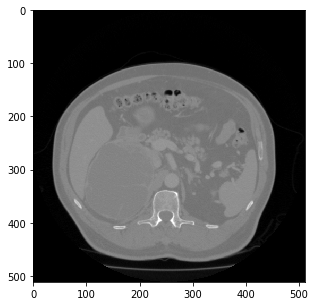

In [8]:
import matplotlib.pyplot as plt
import numpy as np
dicomsPath = 'work/data/dicom/PATIENT_DICOM' 
reader=sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

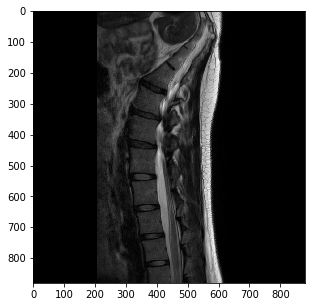

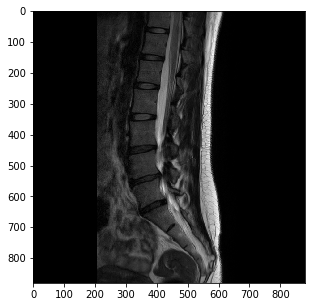

In [9]:
NifitmPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

slice = np.flipud(slice)
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

没有调节窗口窗位之前CT值的范围为-1023~1024
调节窗口窗位之后CT值的范围位为0~255


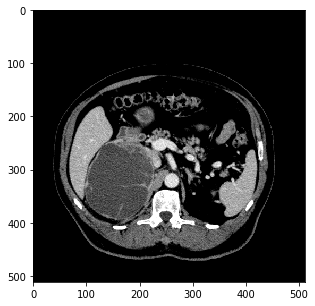

In [11]:
import matplotlib.pyplot as plt
import numpy as np

dicomsPath = 'work/data/dicom/PATIENT_DICOM'  
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("没有调节窗口窗位之前CT值的范围为{}~{}".format(np.min(slice),np.max(slice)))

wincenter = 80
winwidth = 250
min = int(wincenter - winwidth/2.0)
max = int(wincenter + winwidth/2.0)
intensityWindow = sitk.IntensityWindowingImageFilter()
intensityWindow.SetWindowMaximum(max)
intensityWindow.SetWindowMinimum(min)
sitkImage = intensityWindow.Execute(sitkImage)

slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("调节窗口窗位之后CT值的范围位为{}~{}".format(np.min(slice),np.max(slice)))

plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

没有缩放之前CT值的范围为-1023~1024
缩放之后CT值的范围位为0~255


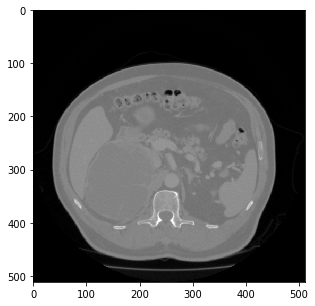

In [12]:
dicomsPath = 'work/data/dicom/PATIENT_DICOM'  
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("没有缩放之前CT值的范围为{}~{}".format(np.min(slice),np.max(slice)))

#通过RescaleIntensity方法既可以进行缩放
sitkImage = sitk.RescaleIntensity(sitkImage)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("缩放之后CT值的范围位为{}~{}".format(np.min(slice),np.max(slice)))

plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

In [13]:
def resampleSpacing(sitkImage, newspace=(1,1,1)):
    euler3d = sitk.Euler3DTransform()
    xsize, ysize, zsize = sitkImage.GetSize()
    xspacing, yspacing, zspacing = sitkImage.GetSpacing()
    origin = sitkImage.GetOrigin()
    direction = sitkImage.GetDirection()
    #新的X轴的Size = 旧X轴的Size *（原X轴的Spacing / 新设定的Spacing）
    new_size = (int(xsize*xspacing/newspace[0]),int(ysize*yspacing/newspace[1]),int(zsize*zspacing/newspace[2]))
    #如果是对标签进行重采样，模式使用最近邻插值，避免增加不必要的像素值
    sitkImage = sitk.Resample(sitkImage,new_size,euler3d,sitk.sitkNearestNeighbor,origin,newspace,direction)
    return sitkImage

#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("重采样前的信息") 
print("尺寸：{}".format(sitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )

print('='*30+'我是分割线'+'='*30)

newResample = resampleSpacing(sitkImage, newspace=[1,1,1])
print("重采样后的信息")
print("尺寸：{}".format(newResample.GetSize()))
print("体素大小(x,y,z):{}".format(newResample.GetSpacing()) )



重采样前的信息
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
==============================我是分割线==============================
重采样后的信息
尺寸：(303, 303, 65)
体素大小(x,y,z):(1.0, 1.0, 1.0)


In [14]:
"""
统一Size
X轴和Y轴的Size和Spacing没有变化，
Z轴的Size和Spacing有变化
"""
def resampleSize(sitkImage, depth):
    #重采样函数
    euler3d = sitk.Euler3DTransform()

    xsize, ysize, zsize = sitkImage.GetSize()
    xspacing, yspacing, zspacing = sitkImage.GetSpacing()
    new_spacing_z = zspacing/(depth/float(zsize))

    origin = sitkImage.GetOrigin()
    direction = sitkImage.GetDirection()
    #根据新的spacing 计算新的size
    newsize = (xsize,ysize,int(zsize*zspacing/new_spacing_z))
    newspace = (xspacing, yspacing, new_spacing_z)
    sitkImage = sitk.Resample(sitkImage,newsize,euler3d,sitk.sitkNearestNeighbor,origin,newspace,direction)
    return sitkImage

DEPTH = 16  #需要重采样Size的层数

#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("重采样前的信息") 
print("尺寸：{}".format(sitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )

print('='*30+'我是分割线'+'='*30)


newsitkImage = resampleSize(sitkImage, depth=DEPTH)
print("重采样后的信息")
print("尺寸：{}".format(newsitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(newsitkImage.GetSpacing()) )

重采样前的信息
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
==============================我是分割线==============================
重采样后的信息
尺寸：(880, 880, 16)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 4.124998569488525)


In [15]:
import numpy as np

#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'work/data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)

#创建numpy 的数据 ，假设这个是模型预测的文件，shape为：(880, 880, 12)
npMask = np.zeros((12,880,880), np.float32)

#现在把预测numpy数据转换成和原nifit数据一致的信息，数据类型是sitkUInt8
#先转换成sitkImage
sitkMask = sitk.GetImageFromArray(npMask)
#转换数据类型
sitkMask = sitk.Cast(sitkMask, sitk.sitkUInt8)


#方式一
#手动设置
sitkMask.SetSpacing(sitkImage.GetSpacing()) #设置spacing
sitkMask.SetOrigin(sitkImage.GetOrigin()) #设置 origin
sitkMask.SetDirection(sitkImage.GetDirection())  #设置方向
#打印两者的信息，除了数据类型，其他都一致
print_info(sitkMask)
print_info(sitkImage)
print('='*30+'我是分割线'+'='*30)

#方式二
#调用CopyInformation即可
sitkMask.CopyInformation(sitkImage)
#打印两者的信息，除了数据类型，其他都一致
print_info(sitkMask)
print_info(sitkImage)

#最后把预测的mask文件保存成NiFit数据即可
sitk.WriteImage(sitkMask,'predictMask.nii.gz')

原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽度:880
高度:880
深度(层数):12
数据类型:8-bit unsigned integer

原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽度:880
高度:880
深度(层数):12
数据类型:32-bit float

==============================我是分割线==============================
原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽

In [16]:
import os
import random
from random import shuffle
import re
import cv2
path_origin = '/home/aistudio/work/train/MR'
path_mask = '/home/aistudio/work/train/Mask'
files = list(filter(lambda x: x.endswith('.nii.gz'), os.listdir(path_origin)))
random.shuffle(files)
rate = int(len(files) * 0.8)  # 训练集和测试集8：2
train_txt = open('/home/aistudio/work/train/train_list.txt', 'w')
val_txt = open('/home/aistudio/work/train/val_list.txt', 'w')
size =list()
for i, f in enumerate(files):
    data_path = os.path.join(path_origin, f)
    mask_name = 'mask_' + f.lower()
    mask_path = os.path.join(path_mask, mask_name)
    # 提取路径中的数字
    number = re.findall(r"\d+\.?\d*", data_path)[0].split('.')[0]
    if i < rate:
        train_txt.write(data_path + ' ' + mask_path+ '\n')
    else:
        val_txt.write(data_path + ' ' + mask_path+ '\n')
print("一共有病例数{}例".format(str(i)))
train_txt.close()
val_txt.close()
print('完成')

一共有病例数171例
完成


In [17]:

from paddle.io import Dataset, DataLoader
import paddleseg.transforms as T
import paddle
import numpy as np
IMAGE_SIZE = (512, 512)


def resampleSize(sitkImage, depth):
    #统一Size
    euler3d = sitk.Euler3DTransform()

    xsize, ysize, zsize = sitkImage.GetSize()
    xspacing, yspacing, zspacing = sitkImage.GetSpacing()
    new_spacing_z = zspacing/(depth/float(zsize))

    origin = sitkImage.GetOrigin()
    direction = sitkImage.GetDirection()
    #根据新的spacing 计算新的size
    newsize = (xsize,ysize,int(zsize*zspacing/new_spacing_z))
    newspace = (xspacing, yspacing, new_spacing_z)
    sitkImage = sitk.Resample(sitkImage,newsize,euler3d,sitk.sitkNearestNeighbor,origin,newspace,direction)
    return sitkImage

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, im, label=None):
        for op in self.transforms:
            outputs = op(im, label)
            im = outputs[0]
            if len(outputs) == 2:
                label = outputs[1]
        im = im / 127.5 -1
        im = np.transpose(im, (2, 0, 1))
        label = np.transpose(label, (2, 0, 1))
        return (im, label)

train_transforms = [
    T.RandomHorizontalFlip(),  # 水平翻转
    T.RandomRotation(max_rotation = 8, im_padding_value =(0, 0, 0), label_padding_value = 0),  # 随机旋转
    T.Resize(target_size=IMAGE_SIZE),
]
val_transforms = [
    T.Resize(target_size=IMAGE_SIZE),
]

def to_one_hot_3d(label, n_classes=20):  # shape = [batch, s, h, w]
    n, s, h, w = label.shape
    x = paddle.zeros([n, n_classes, s, h, w], dtype='int64')
    for i in range(n):
        temp = label[i]
        temp = paddle.reshape(temp, [-1])   # reshape 为向量
        one_hot_label = paddle.nn.functional.one_hot(temp, num_classes=n_classes)
        one_hot_label = paddle.reshape(one_hot_label, [s, h, w,-1])
        one_hot_label = paddle.transpose(one_hot_label, (3,0,1,2))
        
        x[i] = one_hot_label.astype('int64')
    return x


class Spine_DataSet(Dataset):
    def __init__(self, txt_path,transforms=None,mode=None):
        self.mode = mode
        self.filename_list = self.load(txt_path)
        self.transforms = Compose(transforms)

    def __getitem__(self, index):
        data, target = self.get_train_item_by_index(index)
        return  data, target

    def get_train_item_by_index(self, index):
        img, label = self.get_np_data_3d(self.filename_list[index])
        img = np.expand_dims(img, axis=0).astype('float32')
        label = np.expand_dims(label, axis=0).astype('int64')
        return img,label

    def get_np_data_3d(self, filename, resize_scale=1):
        # 读取nii格式，并重采样到resize_scale，这里是（1，1，1），然后转换成numpy格式
        data = self.sitk_read_raw(filename[0])
        label = self.sitk_read_raw(filename[1])
        data = np.transpose(data, (1, 2, 0))
        label = np.transpose(label, (1, 2, 0))

        data = cv2.flip(data,0)
        label = cv2.flip(label,0)
        if self.transforms:
            data ,label= self.transforms(data,label)
        return data, label

    def load(self, txt_path):
        # 读取txt文档，获取文件路径
        file_list = list()
        with open(txt_path, 'r') as f:
            for line in f.readlines():
                file_list.append((line.split()[0],line.split()[1]))
        if self.mode =='train':
            shuffle(file_list)
        return file_list

    def sitk_read_raw(self,img_path):
        #读取nifit格式，设置窗口窗位，并缩放到0到255之间，并转换成numpy格式
        sitkImage = sitk.ReadImage(img_path)
        intensityWindowingFilter = sitk.IntensityWindowingImageFilter()
        # 转换成0到255之间
        intensityWindowingFilter.SetOutputMaximum(255)
        intensityWindowingFilter.SetOutputMinimum(0)
        if 'mask' not in img_path:
            # 调窗宽窗位
            #相当于数据增强中的 改变对比度
            if self.mode =='train':
                max_num = random.randint(1000, 1900)
                min_num = random.randint(-600, 0)
                intensityWindowingFilter.SetWindowMaximum(max_num)
                intensityWindowingFilter.SetWindowMinimum(min_num)
            else:
                #验证集就固定
                intensityWindowingFilter.SetWindowMaximum(1500)
                intensityWindowingFilter.SetWindowMinimum(-300)
        #统一Size
        #这一步可以先把数据处理一遍，不要放在DataSet中，速度会快很多
        sitkImage = resampleSize(sitkImage,16)
        #设置窗宽窗位，并进行缩放
        sitkImage = intensityWindowingFilter.Execute(sitkImage)
        nda = sitk.GetArrayFromImage(sitkImage)
        return nda

    def __len__(self):
        return len(self.filename_list)

In [18]:
"""
重Dataset中读取数据，并可视化
"""
import matplotlib.pyplot as plt

if __name__ == '__main__':
    train_txt = 'work/train/train_list.txt'
    val_txt = 'work/train/val_list.txt'
    train_dataset = Spine_DataSet(train_txt, train_transforms, mode='train')
    val_dataset = Spine_DataSet(val_txt, val_transforms, mode='val')

    for batch_idx, (data, target) in enumerate(train_dataset):
        plt.figure(figsize=(12, 12))
        target =  paddle.to_tensor(target,'int64')
        target = to_one_hot_3d(target)
        print(data.shape, target.shape)
        plt.subplot(121)
        plt.imshow(data[0, 5],'gray')
        plt.subplot(122)
        target = target.numpy()
        plt.imshow(target[0, 1,5],'gray' )
        plt.show()
        if(batch_idx == 4):
            break

TypeError: __call__() takes 2 positional arguments but 3 were given